In [20]:
import nest
import pylab
import numpy
import nest.voltage_trace
from matplotlib import pyplot as plt

plt.rcParams.update({'font.size' : 14})

In [3]:
neuron_params = {
        #'model': 'aeif_cond_exp',
        "a": 0., # subthreshold adaptaiton (nS)
        "b": 0., # spike triggered adaptation (pA)
        'g_ex': 0.0, # exc synaptic conductance
        'g_in': 0.0, # inh synaptic conductance
        'w' : 0.0,
        'tau_w': 150.,
        'Delta_T': 2.,
        'C_m': 150.,
        'g_L': 10.,
        'V_reset': -70., # reset after a spike
        'V_th': -65., # spike initiation threshold
        'E_L': -70., # resting membrane potential
        'E_in': -80.0,
        'V_m': -70., # starting membrane potential
        'V_peak': -65.0, # spike detection threshold
        'tau_syn_ex': 5.,  # exc. synaptic time constant  - mit paper
        'tau_syn_in': 10.,  # exc. synaptic time constant  - mit paper
        "t_ref": 2.5,
        'Delta_T': 2,
}

nest.ResetKernel()

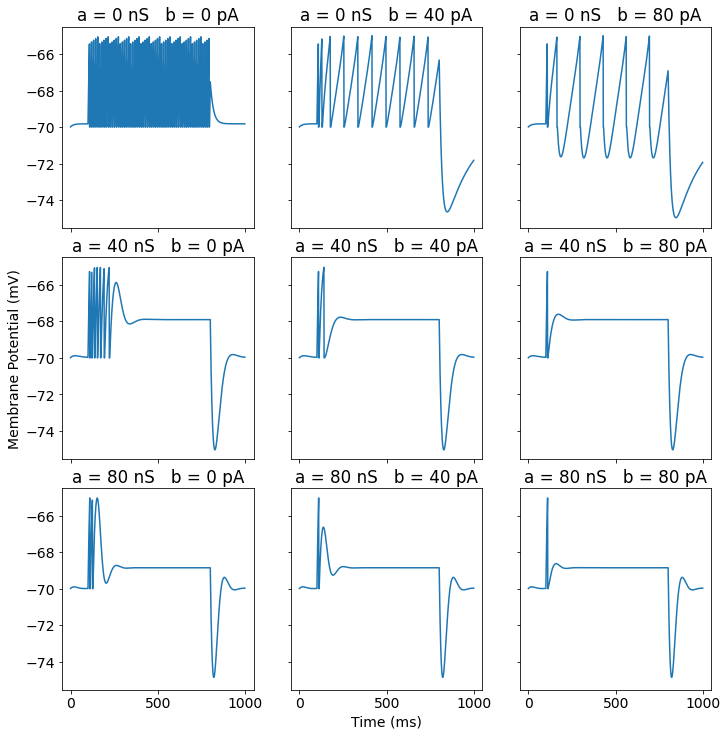

In [22]:
a = numpy.arange(0, 81, 40)
b = numpy.arange(0, 81, 40)

fig, axes = plt.subplots(nrows=len(a), ncols=len(b), figsize=(10, 10), sharex=True, sharey=True);
fig.tight_layout()

axes = axes.reshape(-1)
ax = iter( axes )

for subthresh in a:
    for spktrig in b:
        nest.ResetKernel()

        neuron = nest.Create("aeif_cond_exp", 1)

        neuron_params['a'] = subthresh
        neuron_params['b'] = spktrig

        nest.SetStatus(neuron, neuron_params)

        # neuron.V_m = -60. # (if needed)

        dc = nest.Create("dc_generator", 1)
        inp_amp = 100.  # it's in pA
        nest.SetStatus(dc, {"amplitude": inp_amp, "start": 100.0, "stop": 800.0})

        nest.Connect(dc, neuron, 'one_to_one')
        voltmeter = nest.Create("voltmeter", 1)
        nest.Connect(voltmeter, neuron, 'one_to_one')

        nest.Simulate(1000.0)

        axis = next(ax)
        
        axis.plot(voltmeter.get('events')['V_m'])
        
        ttl = "a = " +str(subthresh) +" nS   b = " +str(spktrig) +" pA"
        axis.set_title(ttl)
        

axes[3].set_ylabel("Membrane Potential (mV)");
axes[7].set_xlabel("Time (ms)");